![networking_skillz](https://jeinson.github.io/images/networking_skills.jpeg)

# Lab 11: Networks and Graphs and Centrality 
##### (oh my)

This weeks's lab will give you experience in netowrk analysis and visualization using the `igraph` library for python. `igraph` provides data types and functions for the implementation of several graph algorithms. 

First things first, install the igraph package in your `Computational_methods` environment. Mac and Linux users can simply run 

`
conda install python-igraph
conda install pycairo` (for plotting igraph objects)

Sorry windows users, but since this package requires a pre-compiled version of C++, so installation is a bit trickier. Just follow the instructions on [igraph website](https://igraph.org/python/#pyinstall)

In [1]:
from igraph import *
import cairocffi # You need this to use the built in plotting function. If you get errors, consult Mr. Google

## 1 Zachary's Karate Club
The goal of this section is to "gently" explore, by example, some commonly used `igraph` functions. We will play with the "Zachary's Karate Club" dataset, a social network of friendhips between members of a karate club at a US university in the '70s. 

Unfortunately, because neutral stars with strong magnetic dipole fields can form helical dynamo action during the first few seconds after gravitational collapse, a fact circumstantially supported by the general relativistic magneto-hydro-dynamic (GRMHD) black hole accretion flow simulation of thick disks, and recently imaged by the [Event Horizon Telescope](https://iopscience.iop.org/article/10.3847/2041-8213/ab0ec7/meta), all the comments have been deleted.

Your task, should you choose to accept it, is to understand and document the following code. 

In [2]:
karate = Graph.Read_GML("daytuh/karate.gml")

In [3]:
print(karate.vcount()) # Who am I?
print(karate.ecount()) # What do I do?
print(karate.is_connected())
print(karate.is_directed())

34
78
True
False


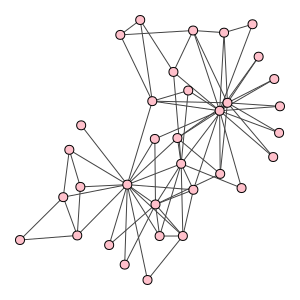

In [4]:
plot(karate, 
     vertex_size = 9, 
     vertex_color = "pink", 
     bbox=(300,300))

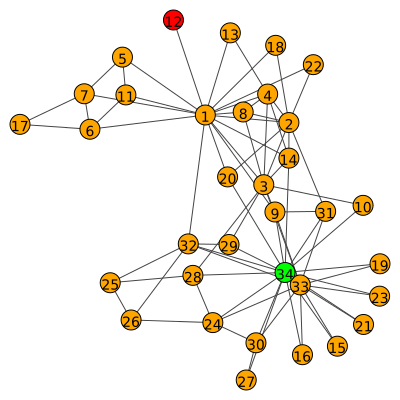

In [5]:
better_karate = karate

better_karate.vs["color"] = "orange"

d = better_karate.degree()
better_karate.vs[d.index(min(d))]["color"] = "red"#
better_karate.vs[d.index(max(d))]["color"] = "green"

layout = better_karate.layout("fr")

better_karate.vs["label"] = [int(i) for i in better_karate.vs['id']]

plot(better_karate, 
             layout = layout,
             bbox=(400,400), 
             margin = 20)

In [6]:
import pandas as pd

centrality_metrics = pd.DataFrame(
     {'vid':karate.vs['id'], 
      'deg':karate.degree(), 
      'bet':karate.betweenness(), 
      'eig':karate.evcent()}
)

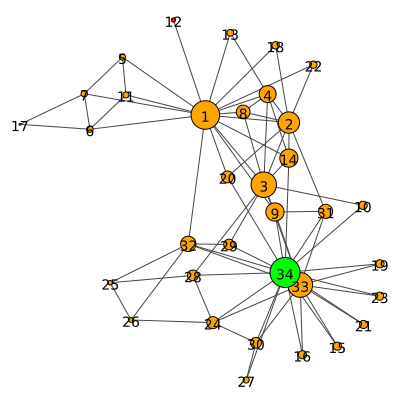

In [7]:
drawing.plot(better_karate, 
             layout = layout,
             pointsize = centrality_metrics['bet'],
             bbox=(400,400), 
             vertex_size = centrality_metrics['eig'] * 30,
             margin = 20)

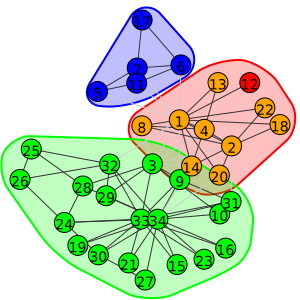

In [8]:
karate_communities = karate.community_label_propagation()
plot(karate_communities, 
     mark_groups = True, 
     bbox=(300,300))

**Task:** Use a different community detection algorithm on the karate graph and visualize the results. If you're feeling comfortable with this type of work: Suppose the group were to break up into two rival krate clubs. Could you use a community detection algorithm to *predict* how the group would break up? (*Hint:* Think about how many clusters or commiunities you're expecting to find)

## 2 Coauthorship Network

Now that we've learned our way arund the software, we'll try to apply some of the network analysis algorithms we learend to gain insight into a so-called "Coauthorship" network" 

### 2.0 Data Description and Background
The zip archived data from the "Coauthorships in network and science" data is available both on the course website and online at [Mark Newman's network data webage](http://www-personal.umich.edu/~mejn/netdata/])[.](https://i.imgur.com/yNlQWRM.jpg)

## 2.1 Loading data

Read the dataset into `igraph